In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv


<h1 style="color:black;font-size:50px; font-weight:bold;"><center><b>EXPLORATORY DATA ANALYSIS ON NETFLIX DATASET</center></h1> 

### Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import plotly.graph_objects as go
import statsmodels.api as sm
import os
import math
from datetime import datetime
from datetime import timedelta
import plotly.express as px
import ast
import random


In [3]:
df= pd.read_csv('../input/netflix-tv-shows-and-movies/titles.csv')

# **Data Preprocessing**

In [4]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [5]:
df.shape

(5850, 15)

In [6]:
df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [7]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [9]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [10]:
def figure_size():
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    font = {'family' : 'normal','size'   : 13}
    
    
    
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    
    elif len(arr) == 1:
        return arr[0]
    
    else:
        return random.choice(arr)

In [11]:
df["production_countries"] = df["production_countries"].apply(repair_array_bound_categories)
df["genres"] = df["genres"].apply(repair_array_bound_categories)

# **Analyze Of Types**

In [12]:
types = df.groupby('type').size().reset_index().rename(columns = {0:'counts'})
types

,type,counts
0,MOVIE,3744
1,SHOW,2106


<Figure size 1080x720 with 0 Axes>

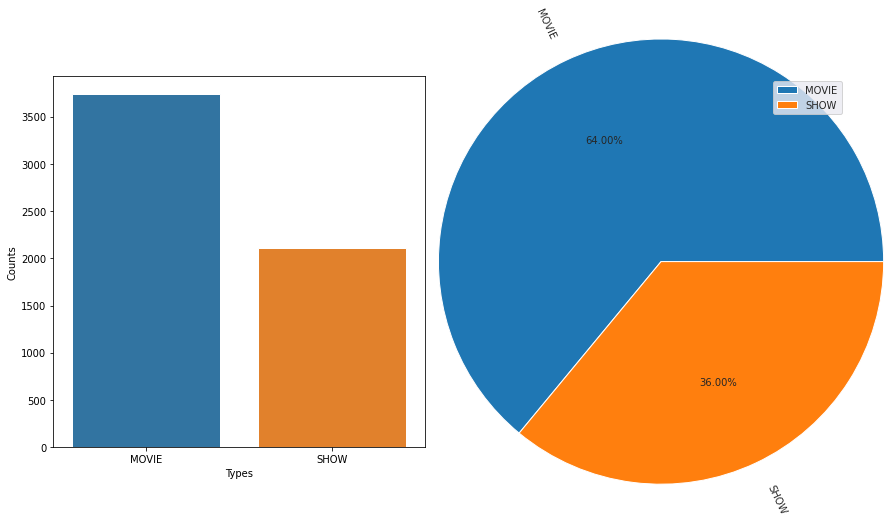

In [13]:
figure_size()
langs= types.type
fig, axes = plt.subplots(1,2, figsize=(12,6))
plt.tight_layout(pad=2)
sns.set_style("darkgrid")
a1=sns.barplot(x = types.type,y = types.counts,ax=axes[0]);
a1.set(xlabel='Types', ylabel='Counts')
plt.pie(types.counts,autopct='%1.2f%%',labels = langs,radius=1.5,labeldistance=1.1 ,   rotatelabels=True)
plt.legend()
plt.show()

## **Observation**

It has been Observed That Netflix has Movies(64.74) more than Shows(32.26).

In [14]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

# **Analyze of Age Certifications**

<Figure size 1080x720 with 0 Axes>

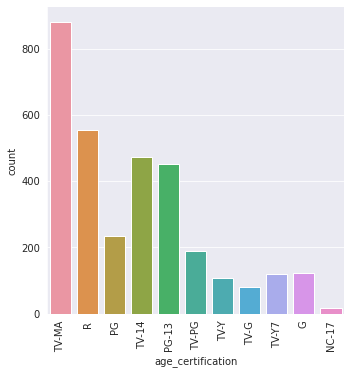

In [15]:
figure_size()
sns.catplot(x='age_certification',kind="count",data=df)
plt.xticks(rotation=90)
plt.show()

## **Observation**
* TV_MA: asigned to be viewed by adults and therefore may be unsuitable for children under 17

# **Analyze Of Genres**

<Figure size 1080x720 with 0 Axes>

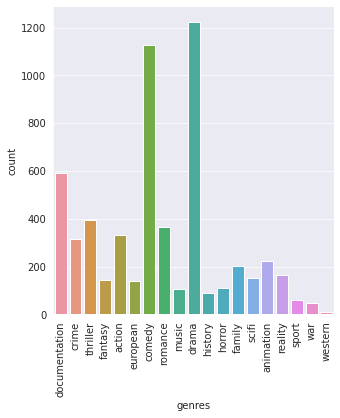

In [16]:
figure_size()
sns.catplot(x='genres', kind="count", data=df)
plt.xticks(rotation=90)
plt.show()

# **Observation**
drama is the most popular Genre.

# **Analyze of Production Countries**

In [17]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [18]:
countries = df.groupby('production_countries').size().reset_index().sort_values(by = 0,ascending = 0).reset_index().drop('index',axis = 1).rename(columns = {0:'counts'})
countries

,production_countries,counts
0,US,2122
1,IN,612
2,GB,288
3,JP,273
4,KR,225
...,...,...
92,CY,1
93,DZ,1
94,NA,1
95,MT,1


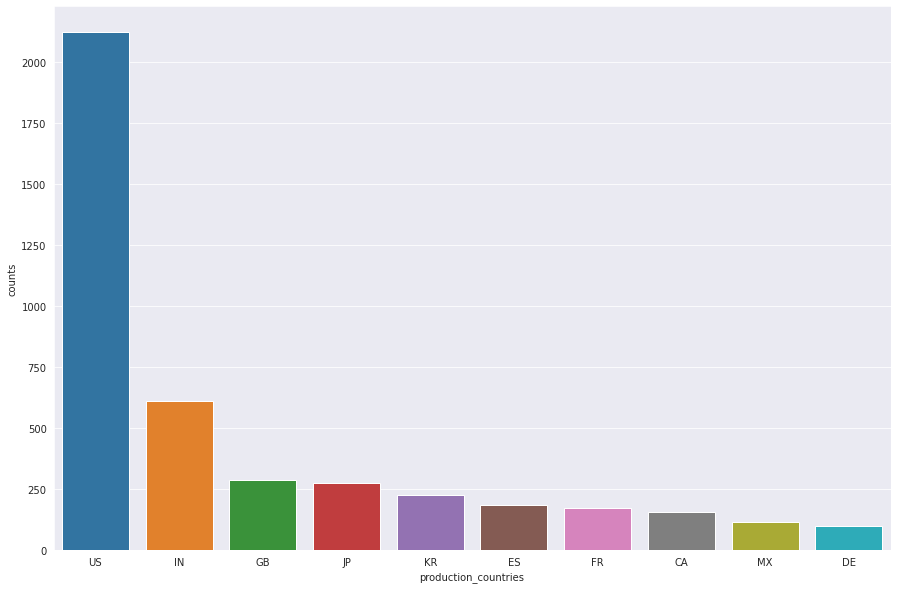

In [19]:
figure_size()
sns.barplot(x = countries.production_countries[:10],y = countries.counts[:10]);
plt.show()

In [20]:

labels = ['US','IN','JP','GB','KR','ES','FR','CA','MX','BR','PH','TR','NG','DE','AU']
values = [1950, 605, 266, 219,210,159,124,103,95,86,80,79,67,65,62]

In [21]:
fig = px.pie(df, values=values, names=labels, title='Most Popular Production Countries')
fig.show()

# **Observation**

As we can observe US is the Most Popular Production Countries.

# **Analyze Of Release Years**

In [22]:
year = df.groupby(['release_year']).size().reset_index().rename(columns = {0:"counts",'release_year':'Year'})
year

,Year,counts
0,1945,1
1,1954,2
2,1956,1
3,1958,1
4,1959,1
...,...,...
58,2018,773
59,2019,836
60,2020,814
61,2021,787


In [23]:
# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(year.Year), y=list(year.counts)))

# Set title
fig.update_layout(
    title_text="No of Movies & Shows Release Over the Years"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [24]:
release_year_count= df.release_year.value_counts()
release_year_count = pd.DataFrame(release_year_count)
release_year_count


,release_year
2019,836
2020,814
2021,787
2018,773
2017,563
...,...
1960,1
1974,1
1959,1
1978,1


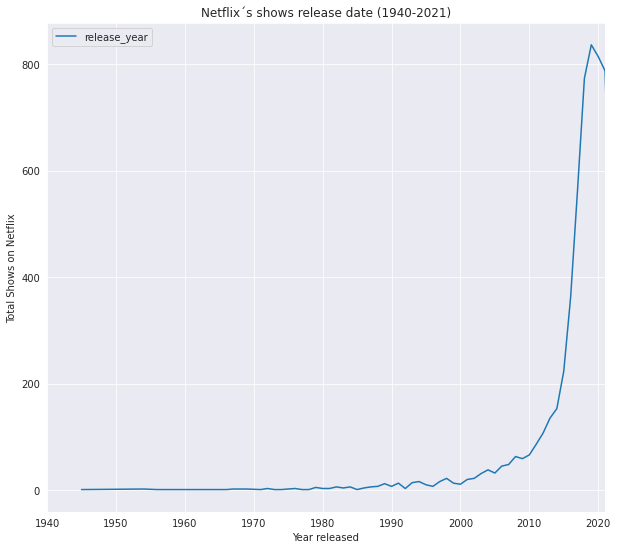

In [25]:
plt.figure(figsize=(10, 9))
sns.lineplot(data= release_year_count)
plt.title('Netflix´s shows release date (1940-2021)')
plt.xlim(1940, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()


# **Observation**

It has been Observed That most of the Movies are released in 2019.

It has been Observed That most of the Movies are released in period of  2010-2019.

# **Deep Analysis**

# **Analyze Of Genre of Each Age Certification**

<AxesSubplot:xlabel='age_certification', ylabel='count'>

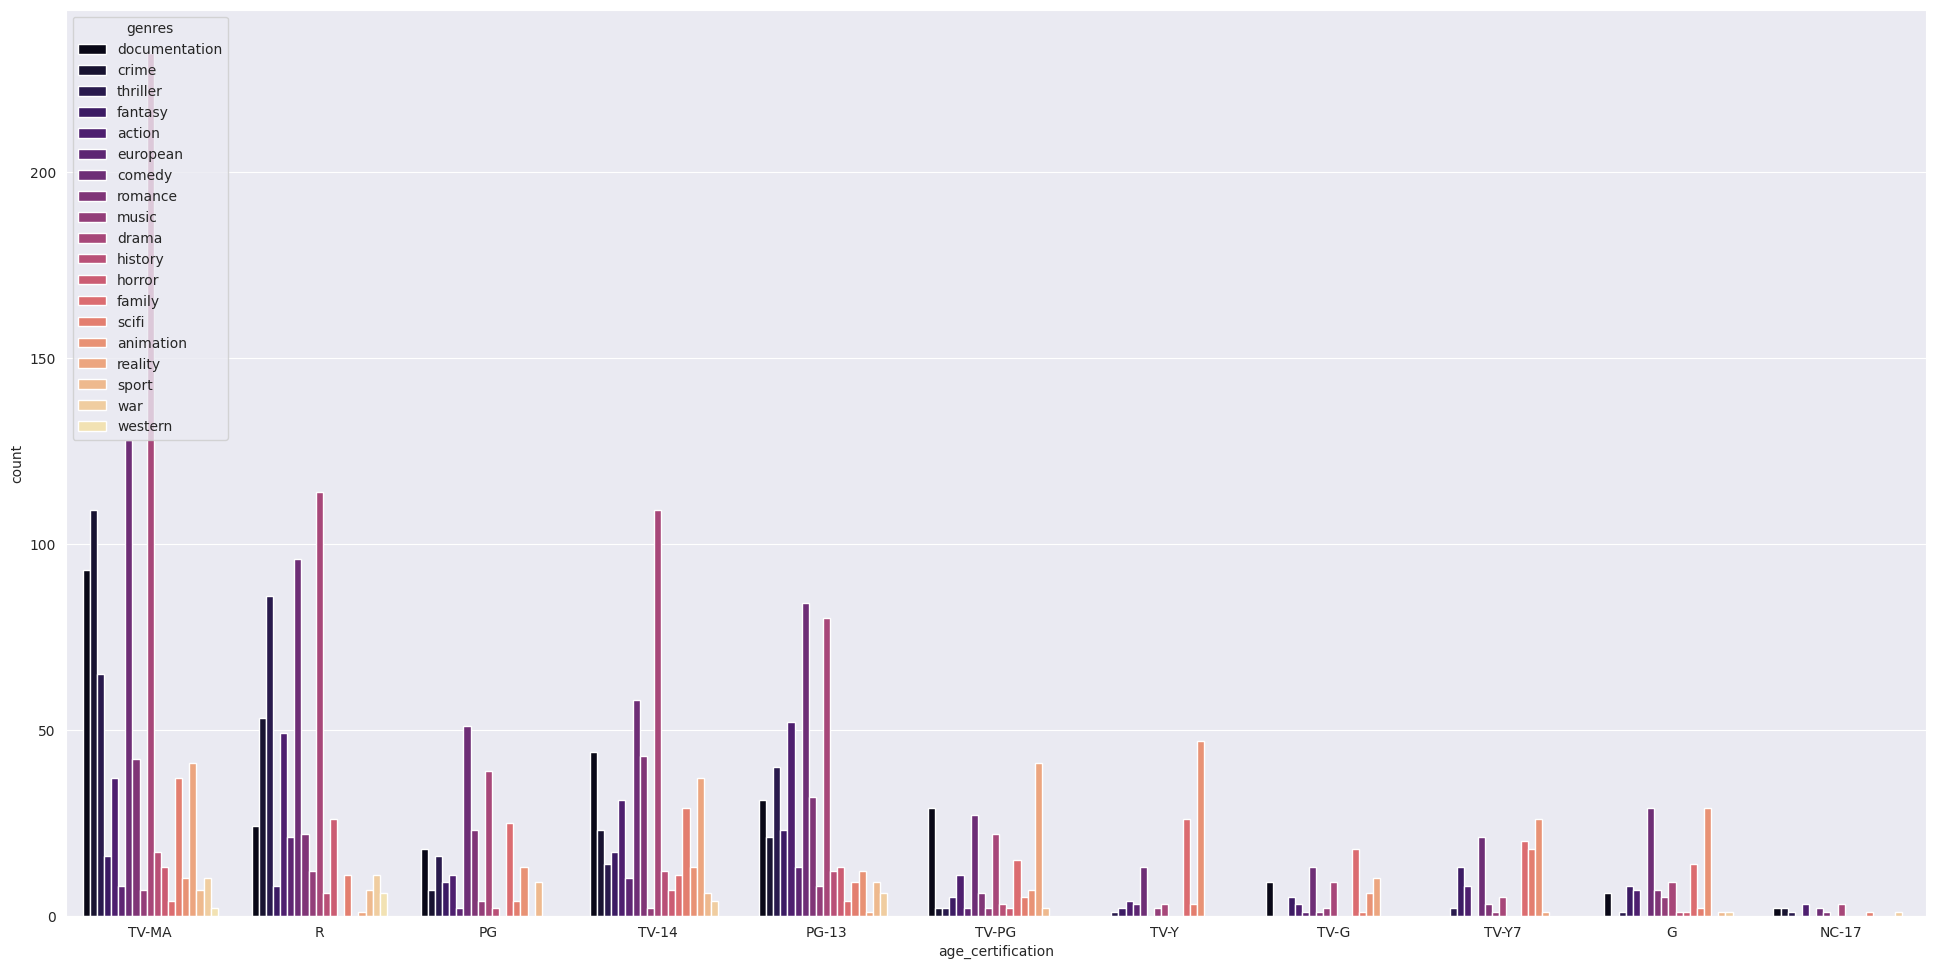

In [26]:
plt.figure(figsize=(24, 12), dpi=100)
sns.countplot(data=df, x="age_certification", hue="genres",palette = 'magma')


**Now let's see imdb_score and tmdb_score**

In [27]:
b= df.groupby('genres')[['imdb_score']].sum().reset_index()
b.head()

,genres,imdb_score
0,action,1966.3
1,animation,1201.0
2,comedy,6632.5
3,crime,2005.6
4,documentation,3605.5


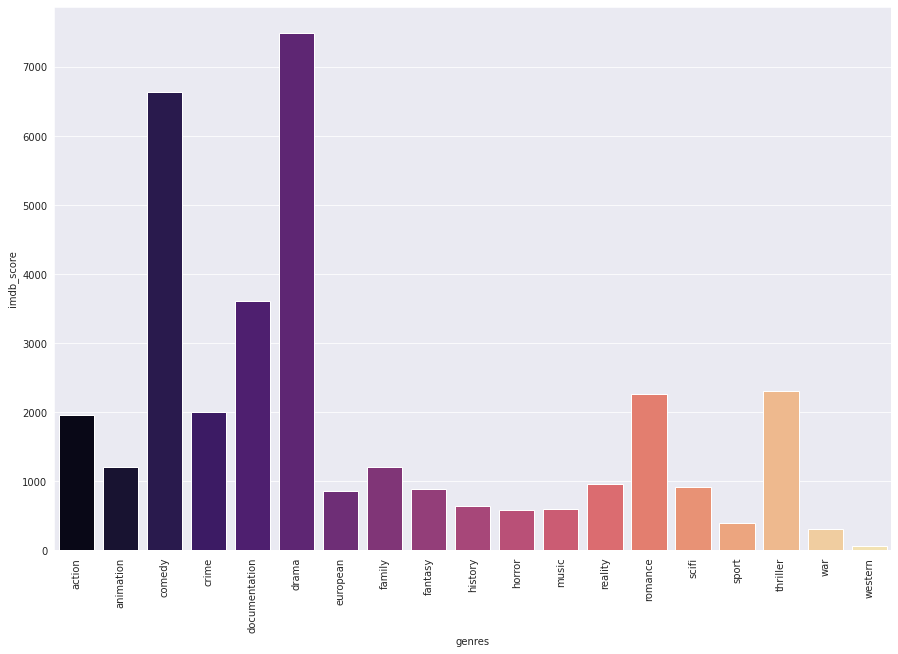

In [28]:
figure_size()
sns.barplot(x='genres',y='imdb_score',data=b,palette = 'magma')
plt.xticks(rotation=90)
plt.show()

In [29]:
b= df.groupby('genres')[['tmdb_score']].sum().reset_index()
b.head()

,genres,tmdb_score
0,action,2131.391
1,animation,1383.933
2,comedy,7100.813
3,crime,2101.499
4,documentation,3975.286


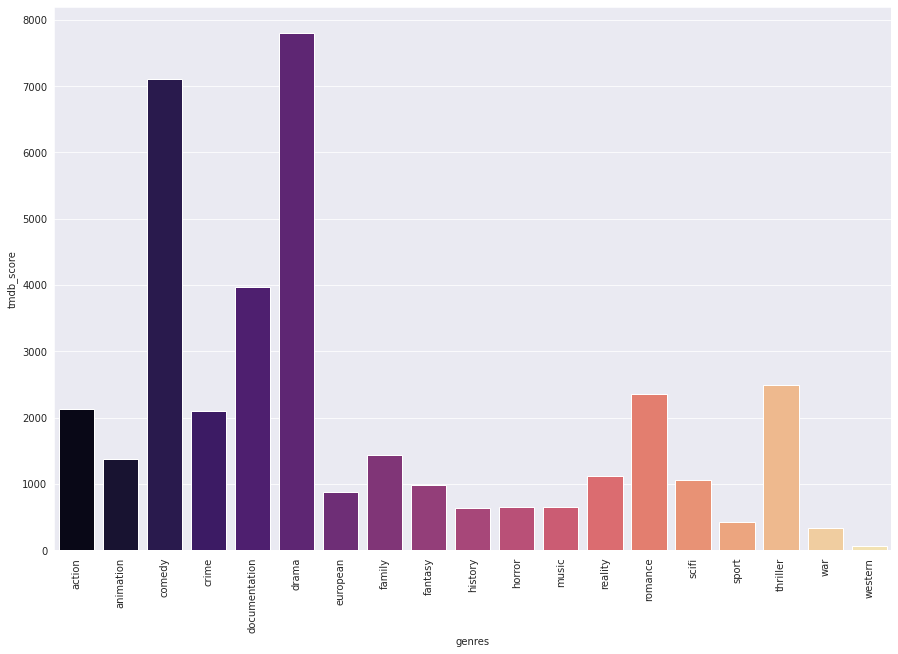

In [30]:
figure_size()
sns.barplot(x='genres',y='tmdb_score',data=b,palette = 'magma')
plt.xticks(rotation=90)
plt.show()

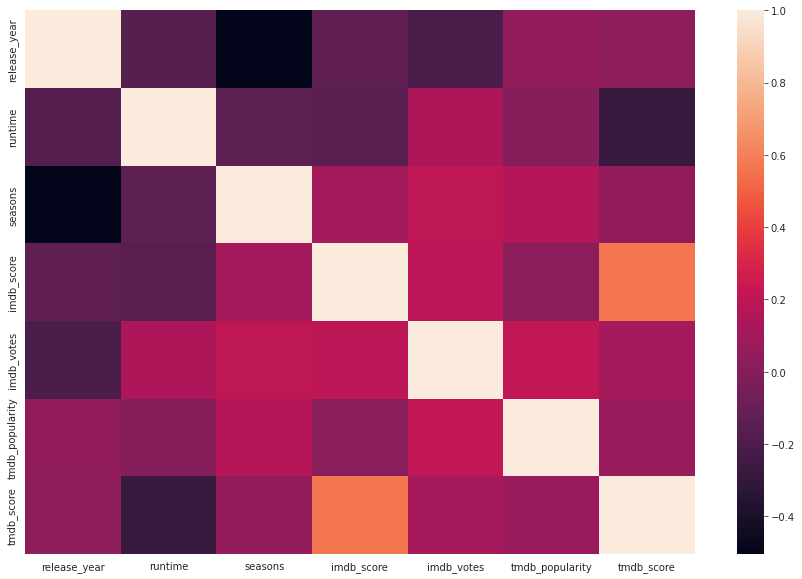

In [31]:
df_num = df[['release_year', 'runtime',   'seasons',  'imdb_score', 'imdb_votes', 'tmdb_popularity',  'tmdb_score']]
figure_size()
sns.heatmap(df_num.corr())
plt.show()

## **Thank You for Reviewing My Notebook. I Will Further Upgrade It More**

## **EDA Done By Rimmel Asghar with ❤**

![that'sallfolks](https://i.ytimg.com/vi/AYZz_qYw_j4/maxresdefault.jpg)